<a href="https://colab.research.google.com/github/yandod/machine-learning-examples/blob/main/06_word2vec_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[1] ライブラリとモデルの準備

In [ ]:
#@title [1-1] セットアップ
!pip install gensim scikit-learn matplotlib huggingface_hub japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=46d4e208ba76a0f96443683483e89d4824718760498d4a0c1f79fa5bfc6a17d4
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [ ]:
#@title [1-2] モデルの初期化
from gensim.models import KeyedVectors
from huggingface_hub import hf_hub_download

target = "Word2vec/wikipedia2vec_jawiki_20180420_100d" # @param ["Word2vec/wikipedia2vec_jawiki_20180420_100d", "Word2vec/wikipedia2vec_jawiki_20180420_300d"]
filename = "jawiki_20180420_100d.txt" # @param ["jawiki_20180420_100d.txt", "jawiki_20180420_300d.txt"]

model = KeyedVectors.load_word2vec_format(hf_hub_download(repo_id=target, filename=filename))



jawiki_20180420_100d.txt:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

# [2] 言語モデルを使った埋め込み表現の操作

In [57]:
#@title [2-1] 指定した単語の埋め込み表現を取得
word = 'トマト' #@param
model[word]

array([ 0.3082, -0.1176,  0.6682,  0.7593,  0.4835, -0.3157, -0.1463,
        0.5866,  0.1131, -1.083 ,  0.7614, -0.2085,  0.5982, -0.0054,
        0.5531,  0.2678, -0.2432, -0.0928, -0.0967,  0.059 , -0.2057,
        0.3069,  0.6565,  0.344 , -0.2718,  0.6047, -0.0223,  0.4012,
       -0.0061,  0.3926,  0.1233,  0.1291, -0.2564,  0.3733, -0.1644,
        0.357 , -0.203 , -0.2401, -0.0268,  0.1669,  0.1729, -0.2435,
        0.8461,  0.2997,  0.4763, -0.1279, -0.3031,  0.1308,  0.5863,
       -0.4767,  0.0071,  0.1982,  0.1326,  0.1953, -0.373 ,  0.2883,
       -0.2882,  0.2146, -0.2413, -0.1265,  0.1945, -0.2841,  0.1087,
        0.0277, -0.0842,  0.1288,  0.2147,  0.3635, -0.6065,  0.8871,
       -0.4412, -0.3601, -0.4576, -0.0372,  0.3122,  0.7335, -0.3071,
       -0.0612,  0.6804,  0.52  ,  0.1405, -0.1833,  0.5452, -0.4702,
        0.0359, -0.6223,  0.6865, -0.9843,  0.4903, -0.3325,  0.4742,
        0.1365, -0.6091,  0.1615, -0.1244,  0.6006, -0.2339,  0.3794,
        0.0439,  0.0

In [58]:
#@title [2-2] 指定した単語同士のコサイン類似度を計算
word2 = 'アメリカ' #@param
model[word2]

from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(
    model[word].reshape(1, -1),
    model[word2].reshape(1, -1)
)
print(similarity)

[[0.25665137]]


In [59]:
#@title [2-3] 指定した単語に類似する単語の出力
word = 'トマト' #@param
model.most_similar(word)

[('ENTITY/トマト', 0.8883192539215088),
 ('キャベツ', 0.8764464855194092),
 ('タマネギ', 0.8539906144142151),
 ('野菜', 0.8539106249809265),
 ('ニンジン', 0.8507416844367981),
 ('ピーマン', 0.8500462770462036),
 ('レタス', 0.8495763540267944),
 ('ほうれん草', 0.8482651114463806),
 ('ケチャップ', 0.8420989513397217),
 ('カボチャ', 0.8379560708999634)]

In [60]:
#@title [2-4] 単語のベクトルの加算・減算
model.most_similar(positive=['国王','女性'],negative=['男性'])

[('王族', 0.8071177005767822),
 ('王妃', 0.8053624033927917),
 ('摂政', 0.7861239314079285),
 ('王室', 0.7674797177314758),
 ('ENTITY/国王', 0.7604337930679321),
 ('退位', 0.76042240858078),
 ('母后', 0.7600308060646057),
 ('ムクリン・ビン・アブドゥルアズィーズ', 0.756911039352417),
 ('サウード・ビン・アブドゥルアズィーズ', 0.755693793296814),
 ('サワーンワッタナー', 0.7546075582504272)]

# [3] さまざまな単語の埋め込み表現を取得し、プロットして比較する

In [62]:
#@title [3-1] 単語に対応する埋め込み表現をモデルから取得
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
from gensim.models import Word2Vec, KeyedVectors

#任意の単語リスト
words = [
    'パン',
    'おにぎり',
    '寿司',
    'ステーキ',
    '焼きそば',
    'ピザ',
    'スパゲッティ',
    'アメリカ',
    '日本',
    'イタリア',
    '猫',
    'クジラ',
    '大陸',
    '富士山',
    '日本刀',
    '手裏剣',
    'ピストル'
]

#予備の単語リスト
#words = ['日本','東京','イタリア','ローマ','ロシア','モスクワ','アメリカ','ニューヨーク','中国','北京','韓国','ソウル']

vectors = np.array([model[word] for word in words])  # 修正点


vectors[:2]

array([[ 0.4686,  0.3949, -0.0483,  0.4863,  0.2345, -0.1823,  0.0092,
         0.3959, -0.3252, -0.5188,  0.8029, -0.3655,  0.5788, -0.341 ,
         0.3337, -0.4043, -0.9416, -0.1727,  0.1405,  0.2796, -0.4737,
         0.2671,  0.5207,  0.1393, -0.1864,  0.7311,  0.0359,  0.3171,
         0.1325,  0.5185,  0.3924,  0.3371, -0.5191,  0.0567,  0.1328,
         0.449 ,  0.2329, -0.2016,  0.0455, -0.0504,  0.0118, -0.4936,
         0.8217,  0.2128,  0.3186, -0.8246, -0.7224, -0.0704,  0.1023,
         0.1019,  0.3609, -0.1374,  0.0178,  0.0413, -0.5915,  0.6725,
        -0.4221, -0.0134, -0.0898, -0.1132,  0.3436, -0.3255, -0.0114,
         0.0621, -0.0692,  0.2765,  0.6353, -0.0972,  0.1211,  0.9284,
        -0.1594, -0.1257,  0.0863,  0.084 ,  0.0655,  0.205 , -0.4833,
        -0.4498,  0.4867,  0.5436,  0.5121, -0.0379, -0.2688, -0.1712,
         0.5039, -0.2672,  0.6115, -0.2373, -0.1397, -0.0043,  0.7335,
         0.2705,  0.0078, -0.0129, -0.1621,  0.4356, -0.1872,  0.064 ,
      

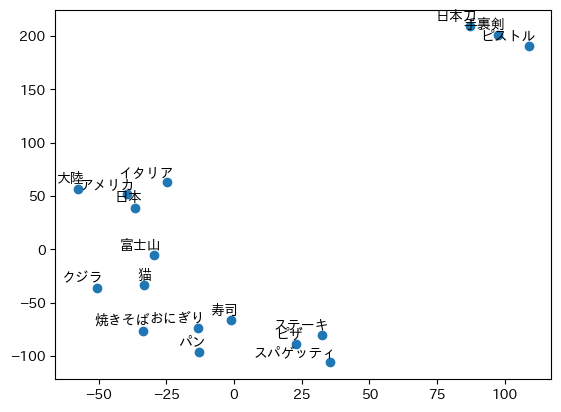

In [63]:
#@title [3-2] t-SNEで次元削減してプロット
from sklearn.manifold import TSNE

# t-SNEで2次元に次元削減
tsne = TSNE(n_components=2, random_state=0, perplexity=2)  # perplexityを2に設定
Y = tsne.fit_transform(vectors)


# プロット
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

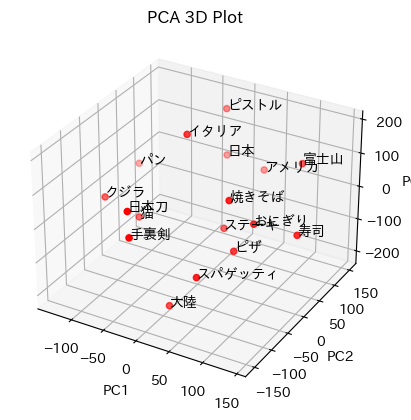

In [64]:
#@title [3-3] t-SNEで次元削減して3次元にプロット
from sklearn.manifold import TSNE

# t-SNEで3次元に次元削減
tsne = TSNE(n_components=3, random_state=0, perplexity=2)  # perplexityを2に設定
Y = tsne.fit_transform(vectors)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c='r', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D Plot')


for i, word in enumerate(words):
  ax.text(Y[i, 0], Y[i, 1], Y[i, 2], word)
plt.show()


In [65]:
#@title [3-4] マウス操作に対応したPlotlyでプロットする
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px

# DataFrameに変換
import pandas as pd
df = pd.DataFrame(Y, columns=['PC1', 'PC2', 'PC3'])

# 3Dプロット
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', text=words)
fig.show()

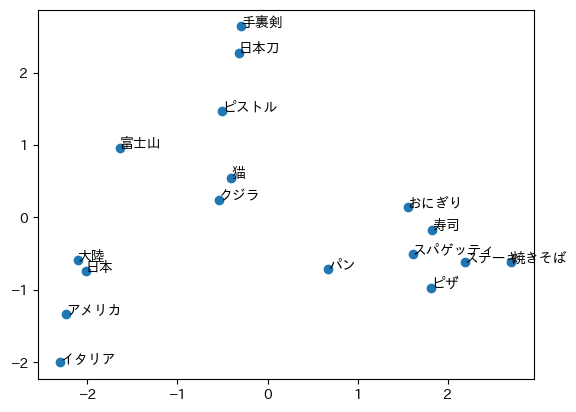

In [66]:
#@title [3-5] PCAで次元削減してプロット
from sklearn.decomposition import PCA

# PCAの適用
pca = PCA(n_components=2)
result = pca.fit_transform(vectors)

# プロット
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()


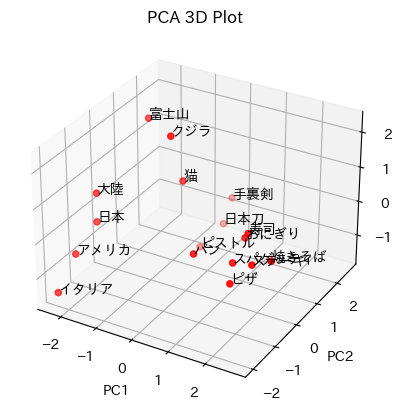

In [67]:
#@title [3-6] PCAで次元削減して3次元にプロット
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(vectors)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c='r', marker='o')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA 3D Plot')


for i, word in enumerate(words):
  ax.text(reduced_data[i, 0], reduced_data[i, 1], reduced_data[i, 2], word)
plt.show()

In [68]:
#@title [3-7] マウス操作に対応したPlotlyでプロットする
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px

# PCAで3つの主成分を抽出
#pca = PCA(n_components=3)
#reduced_data = pca.fit_transform(vectors)

# DataFrameに変換
import pandas as pd
df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2', 'PC3'])

# 3Dプロット
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3', text=words)
fig.show()
